In [77]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
# 필요한 라이브러리 불러오기
from sklearn.svm import SVC
from sklearn.svm import SVR

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import sklearn.metrics as mt
from sklearn.model_selection import cross_val_score, cross_validate

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import DBSCAN
import os
import random
from sklearn.preprocessing import MinMaxScaler, StandardScaler, normalize



warnings.filterwarnings("ignore")

df = pd.read_csv('/content/drive/My Drive/train_V2.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [80]:
df.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,...,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446965e+06
mean,2.338149e-01,1.106908e+00,1.307171e+02,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050060e+02,9.247833e-01,5.439551e-01,...,1.646590e-01,6.061157e+02,3.496091e-03,4.509322e+00,2.386841e-02,7.918208e-03,1.154218e+03,3.660488e+00,6.064601e+02,4.728216e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275049e+02,1.558445e+00,7.109721e-01,...,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261157e-02,1.183497e+03,2.456544e+00,7.397004e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,1.909750e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,...,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


In [81]:
is_null = df.isnull().any()
print(is_null)

Id                 False
groupId            False
matchId            False
assists            False
boosts             False
damageDealt        False
DBNOs              False
headshotKills      False
heals              False
killPlace          False
killPoints         False
kills              False
killStreaks        False
longestKill        False
matchDuration      False
matchType          False
maxPlace           False
numGroups          False
rankPoints         False
revives            False
rideDistance       False
roadKills          False
swimDistance       False
teamKills          False
vehicleDestroys    False
walkDistance       False
weaponsAcquired    False
winPoints          False
winPlacePerc        True
dtype: bool


In [82]:
num_missing = df['winPlacePerc'].isnull().sum()

print("결측치 개수:", num_missing)
df = df.dropna()

결측치 개수: 1


In [83]:
# maxPlace가 일정 수준 이하인 경우 제거(특이한 상황일 가능성 높음)
df=df[df['maxPlace']>20]

# 최고 등수보다 킬 수가 많은 이상치 제거
df = df[(df['kills'] <= df['maxPlace'])]

# 차량 탄 거리가 0인데 roadkill이 1 이상인 경우
df = df.drop(df[(df['rideDistance'] == 0) & (df['roadKills'] > 0)].index)

# 한 매치에서 최대 킬 수가 해당 매치의 참여 인원수보다 많은 경우
df = df.groupby('matchId').filter(lambda x: x['kills'].max() <= x['numGroups'].max())

# 움직인 거리가 0인데 무기 획득 개수가 0보다 큰 경우 이상치로 판단하여 제거
df.drop(df[(df['walkDistance'] ==0) & (df['weaponsAcquired'] > 0)].index, inplace=True)

# 적을 1번 이상 다운시켰는데 입힌 대미지가 0인 경우 이상치로 판단하여 제거
df.drop(df[(df['DBNOs']>0)&(df['damageDealt']==0)].index, inplace=True)

In [84]:
#특수 게임모드 이름 배열
words_to_match = ['crashfpp', 'flaretpp', 'crashtpp', 'flarefpp']

# 특수 게임 모드 제거
df = df[~df['matchType'].isin(words_to_match)]

In [85]:
df['matchType'].unique()

array(['squad-fpp', 'duo', 'solo-fpp', 'squad', 'duo-fpp', 'solo',
       'normal-duo-fpp', 'normal-solo-fpp', 'normal-squad-fpp',
       'normal-squad', 'normal-solo'], dtype=object)

In [86]:
match_types = ['squad-fpp', 'duo', 'solo-fpp', 'squad', 'duo-fpp', 'solo',
               'normal-squad-fpp', 'normal-solo-fpp', 'normal-duo-fpp',
               'normal-squad', 'normal-duo', 'normal-solo']

In [87]:
df['solo'] = 0
df['duo'] = 0
df['squad'] = 0
df['normal'] = 0
df['fpp'] = 0

for match_type in match_types:
    if 'solo' in match_type:
        df.loc[df['matchType'] == match_type, 'solo'] = 1
    if 'duo' in match_type:
        df.loc[df['matchType'] == match_type, 'duo'] = 1
    if 'squad' in match_type:
        df.loc[df['matchType'] == match_type, 'squad'] = 1
    if 'normal' in match_type:
        df.loc[df['matchType'] == match_type, 'normal'] = 1
    if 'fpp' in match_type:
        df.loc[df['matchType'] == match_type, 'fpp'] = 1

In [88]:
selected_columns = ['matchType', 'solo', 'duo', 'squad', 'normal', 'fpp']
df_selected = df[selected_columns]
print(df_selected)

         matchType  solo  duo  squad  normal  fpp
0        squad-fpp     0    0      1       0    1
1        squad-fpp     0    0      1       0    1
2              duo     0    1      0       0    0
3        squad-fpp     0    0      1       0    1
4         solo-fpp     1    0      0       0    1
...            ...   ...  ...    ...     ...  ...
4446961  squad-fpp     0    0      1       0    1
4446962       solo     1    0      0       0    0
4446963  squad-fpp     0    0      1       0    1
4446964  squad-fpp     0    0      1       0    1
4446965   solo-fpp     1    0      0       0    1

[4370900 rows x 6 columns]


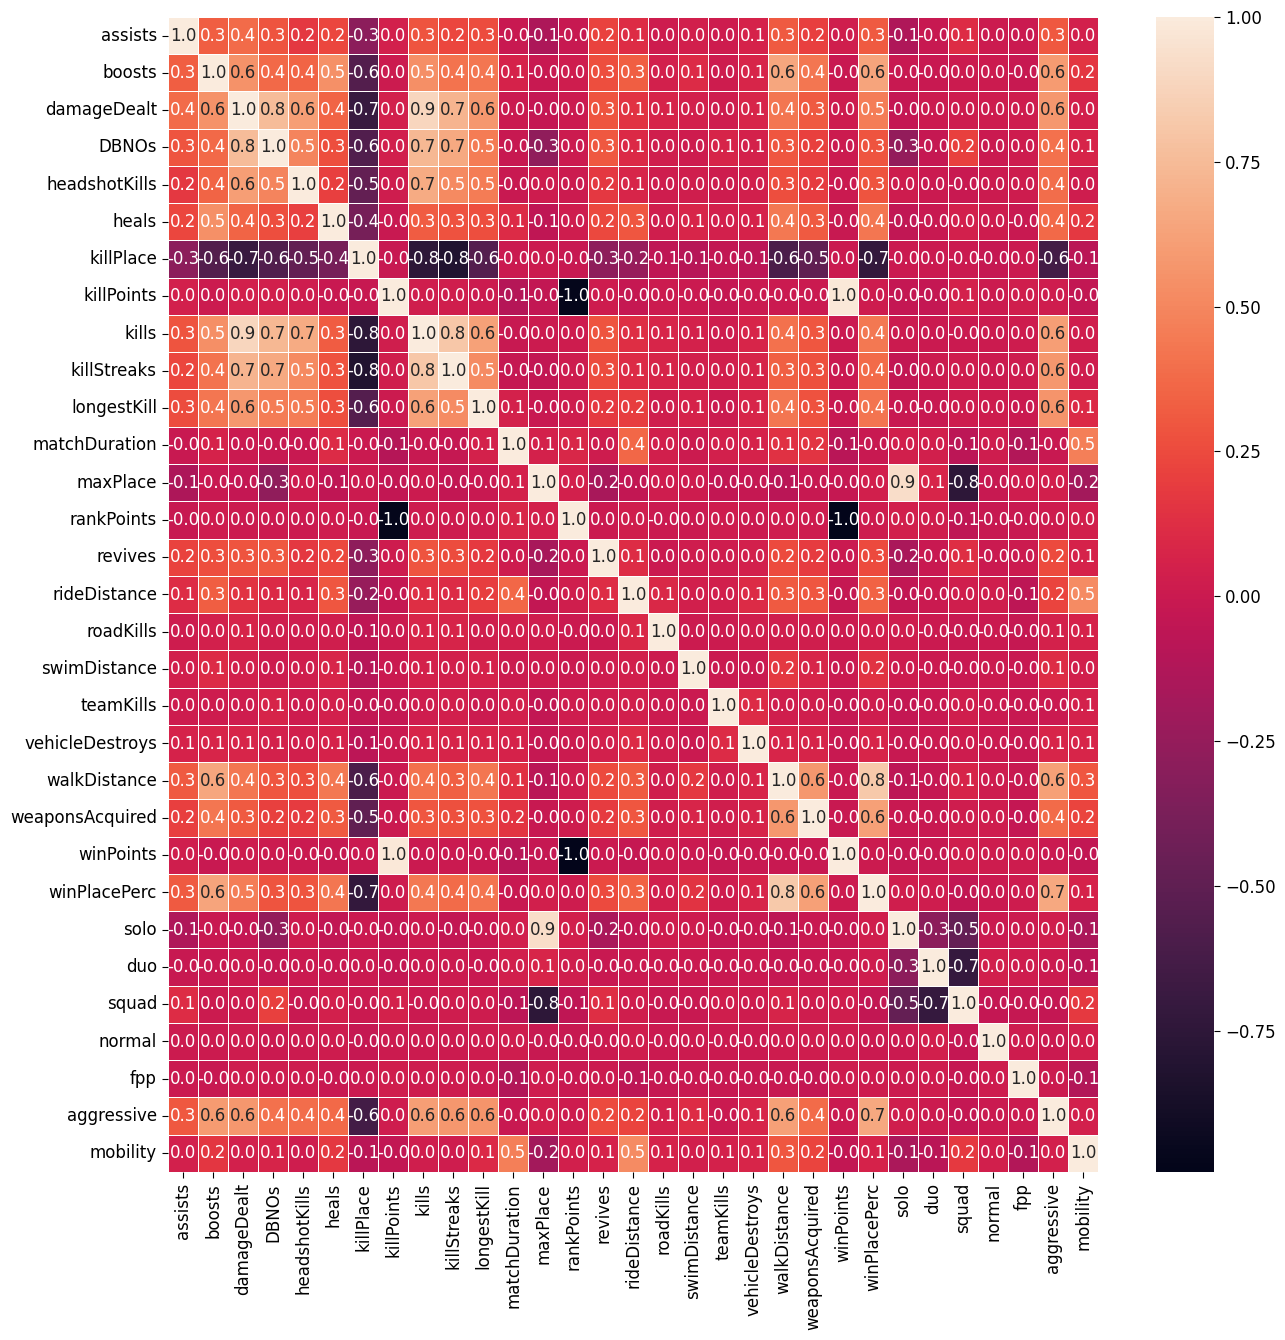

In [136]:
# 전체 컬럼 간의 히트맵
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

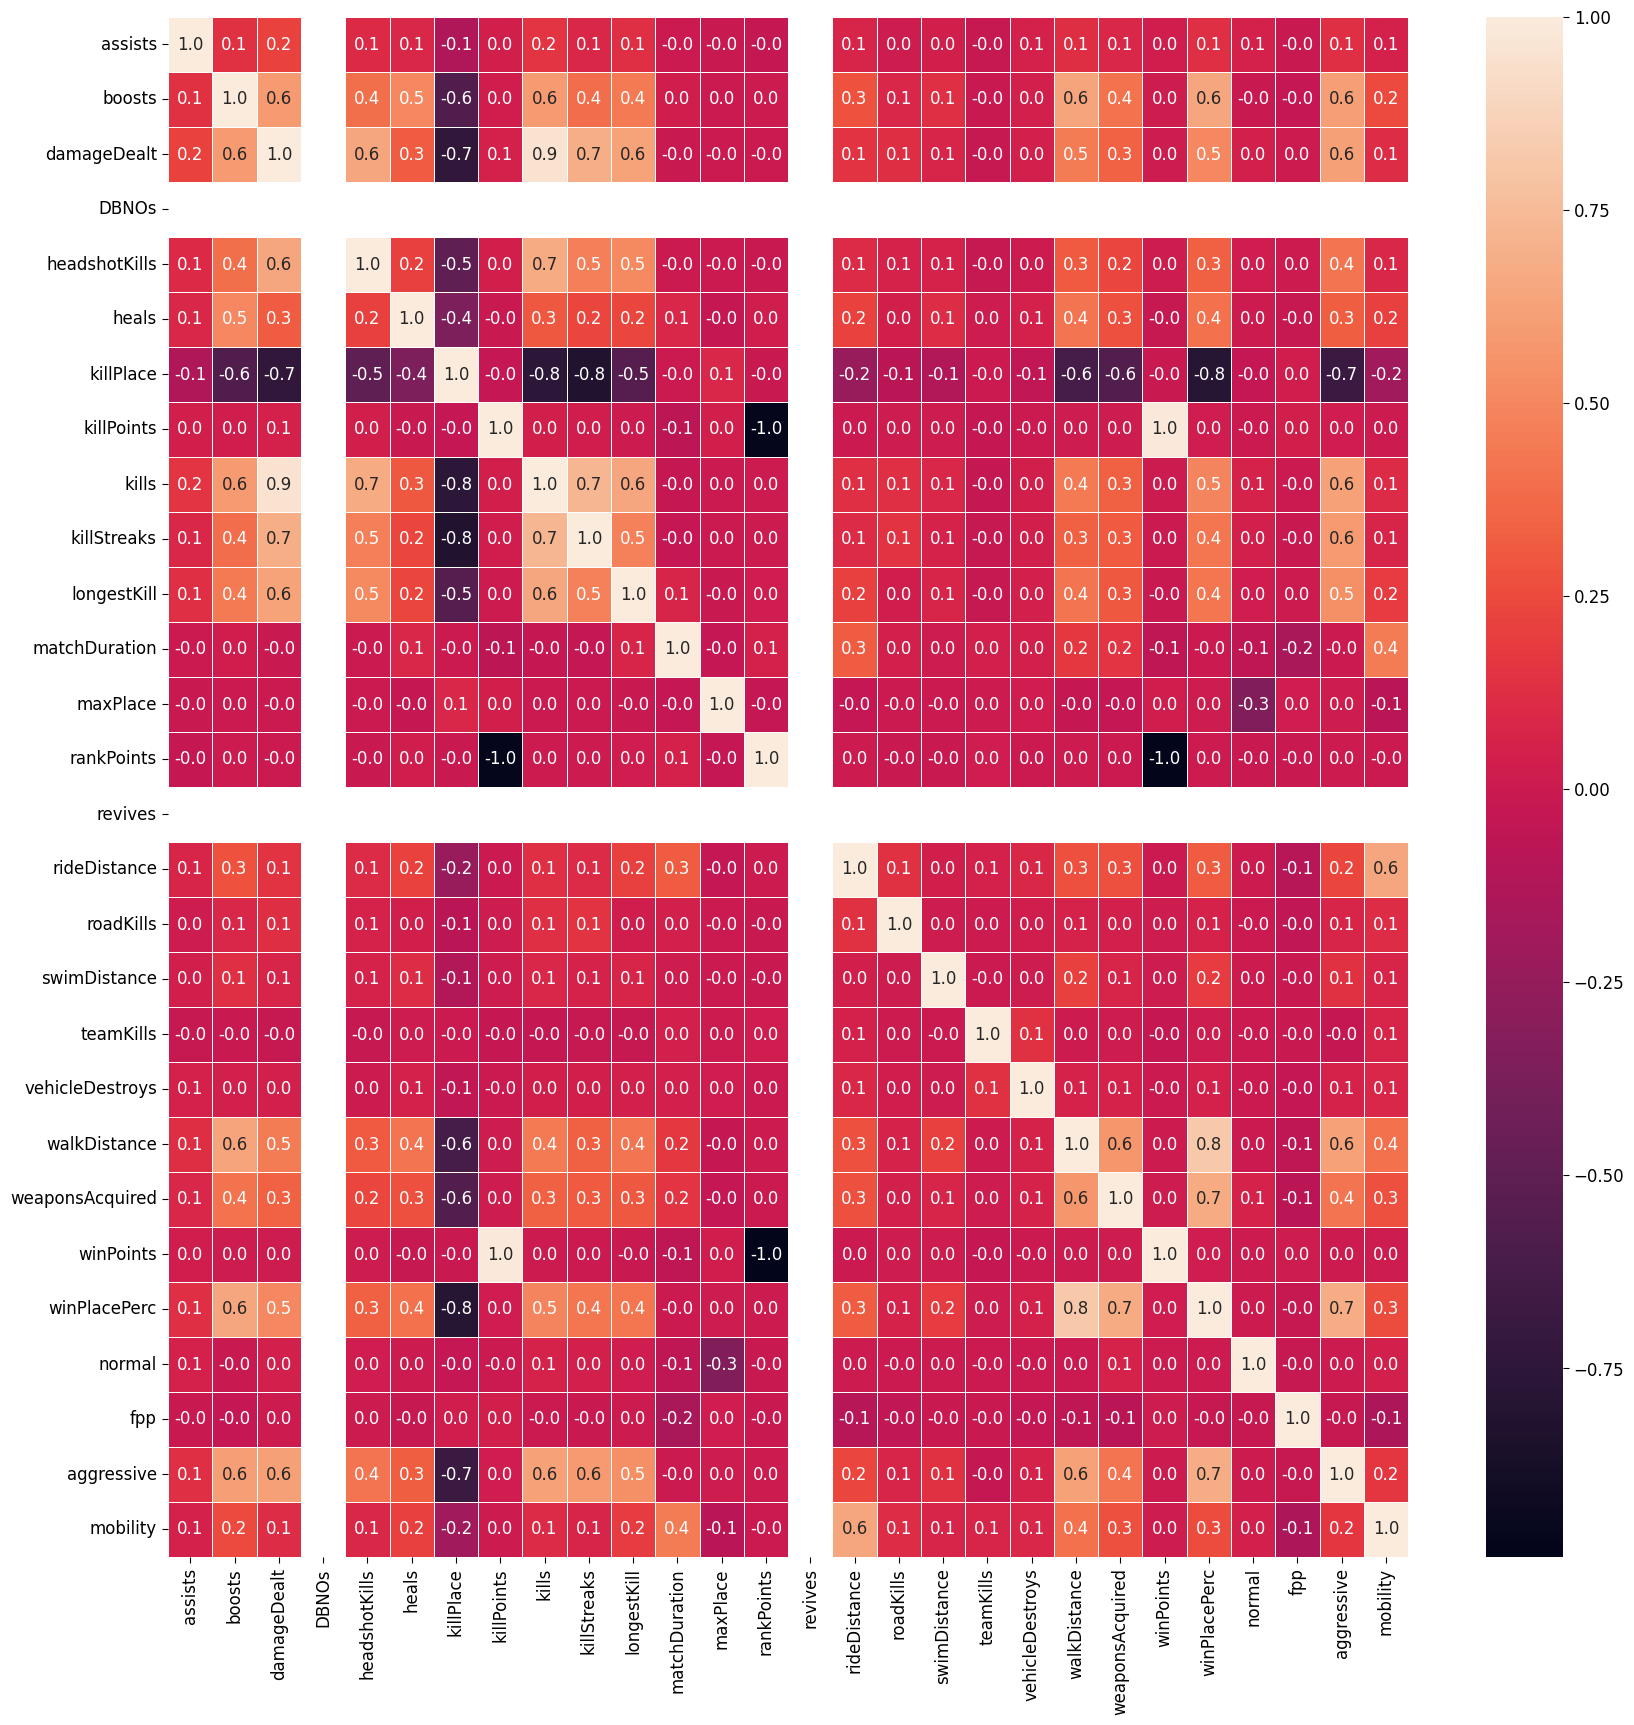

In [133]:
# solo 전체 컬럼 간의 히트맵
solo = df[(df['solo'] == 1)]
solo = solo.drop(['solo', 'duo', 'squad'], axis=1)
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(solo.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

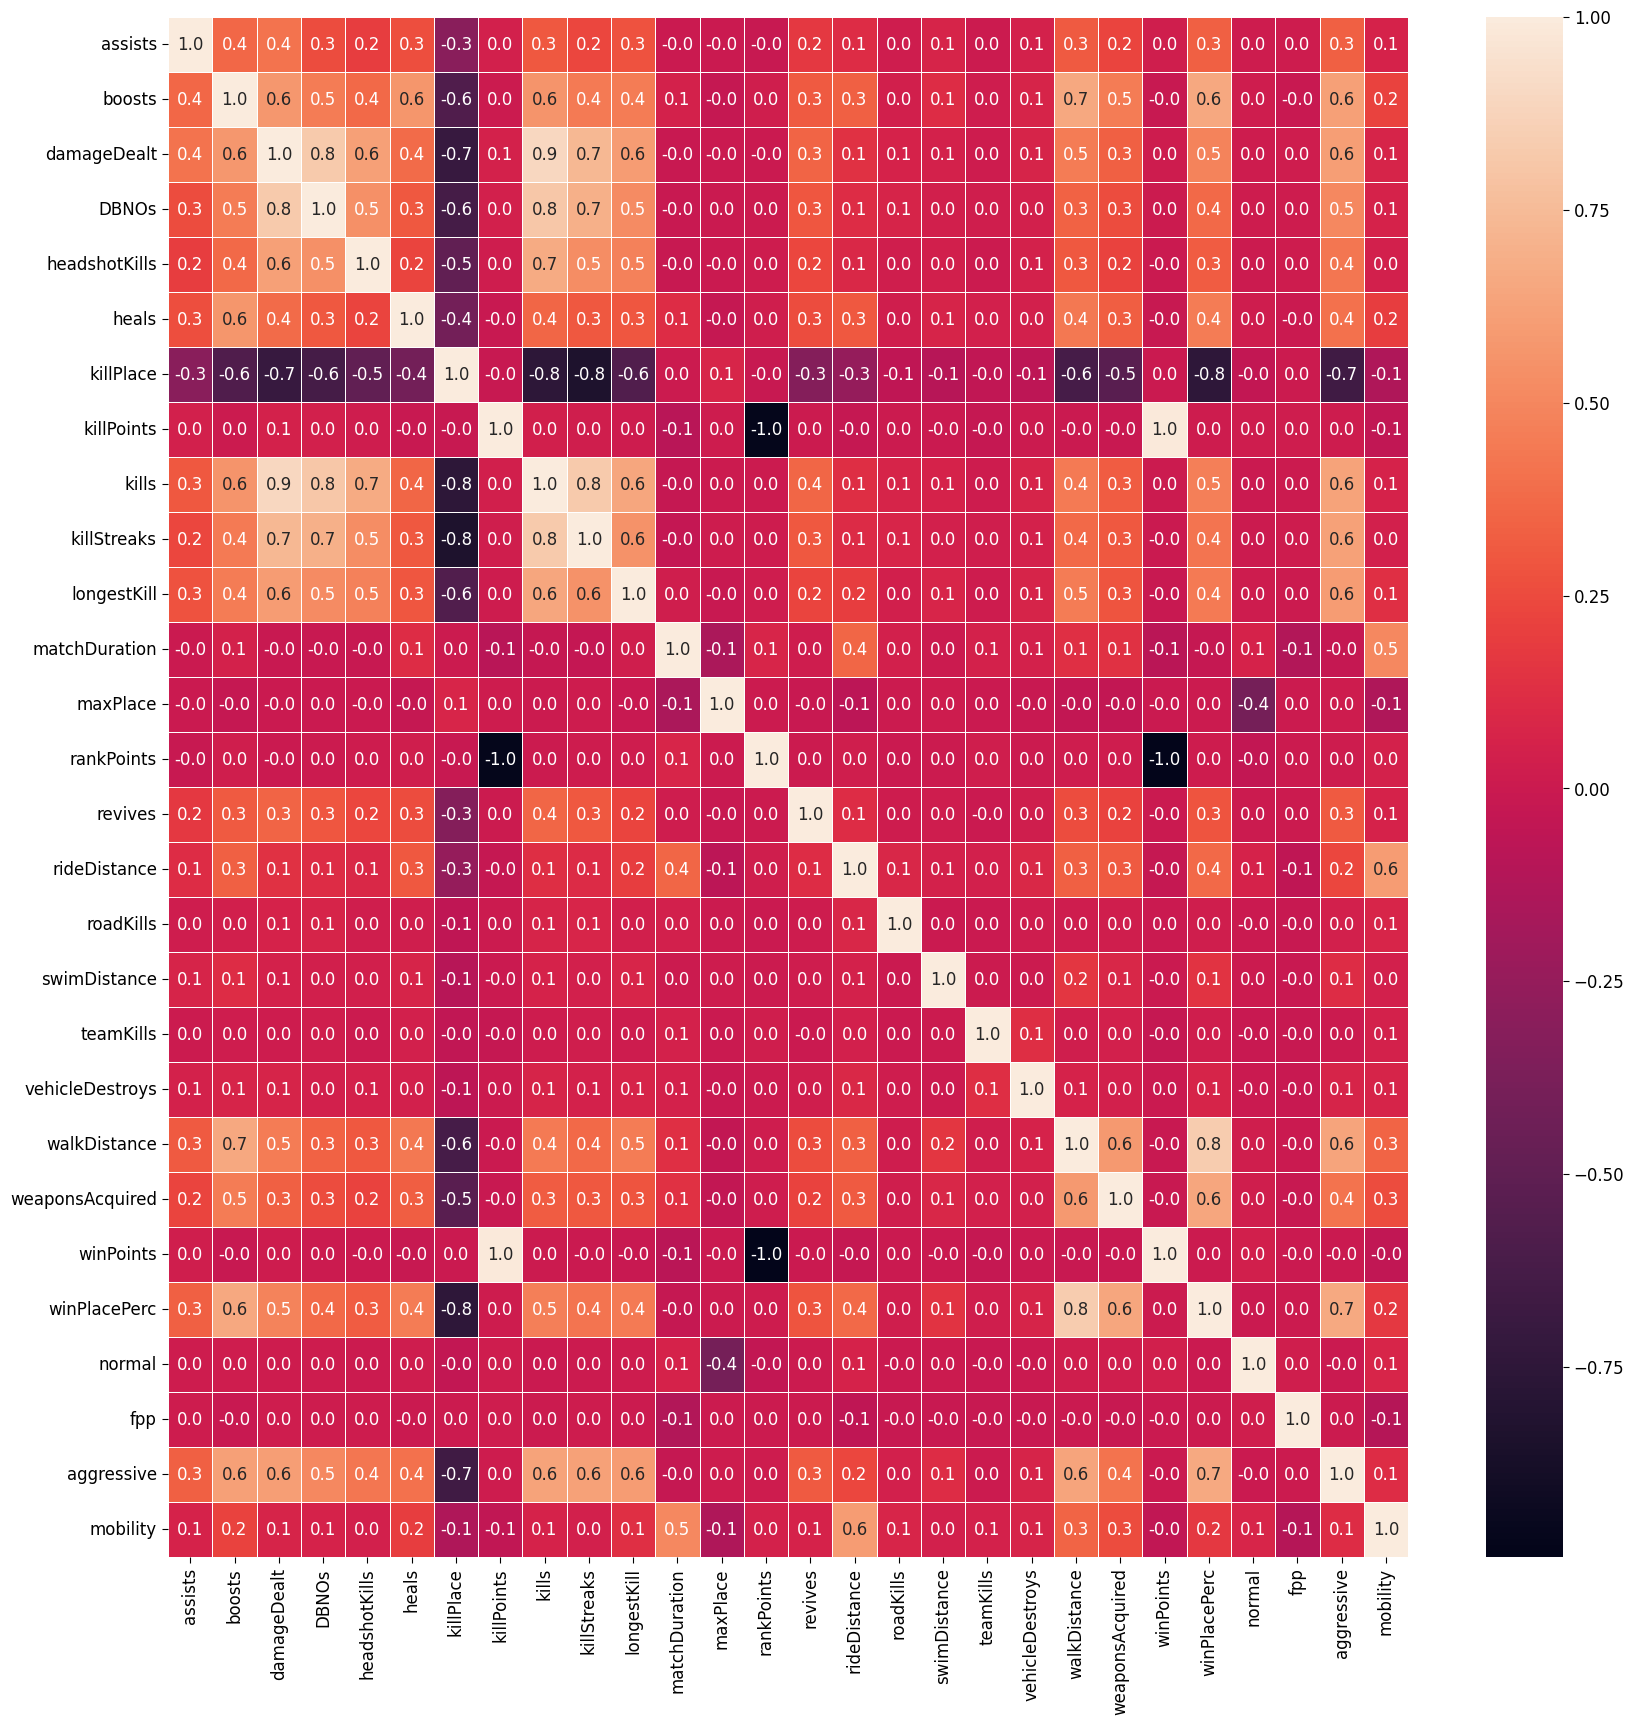

In [134]:
# 전체 컬럼 간의 히트맵
duo = df[(df['duo'] == 1)]
duo = duo.drop(['solo', 'duo', 'squad'], axis=1)
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(duo.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

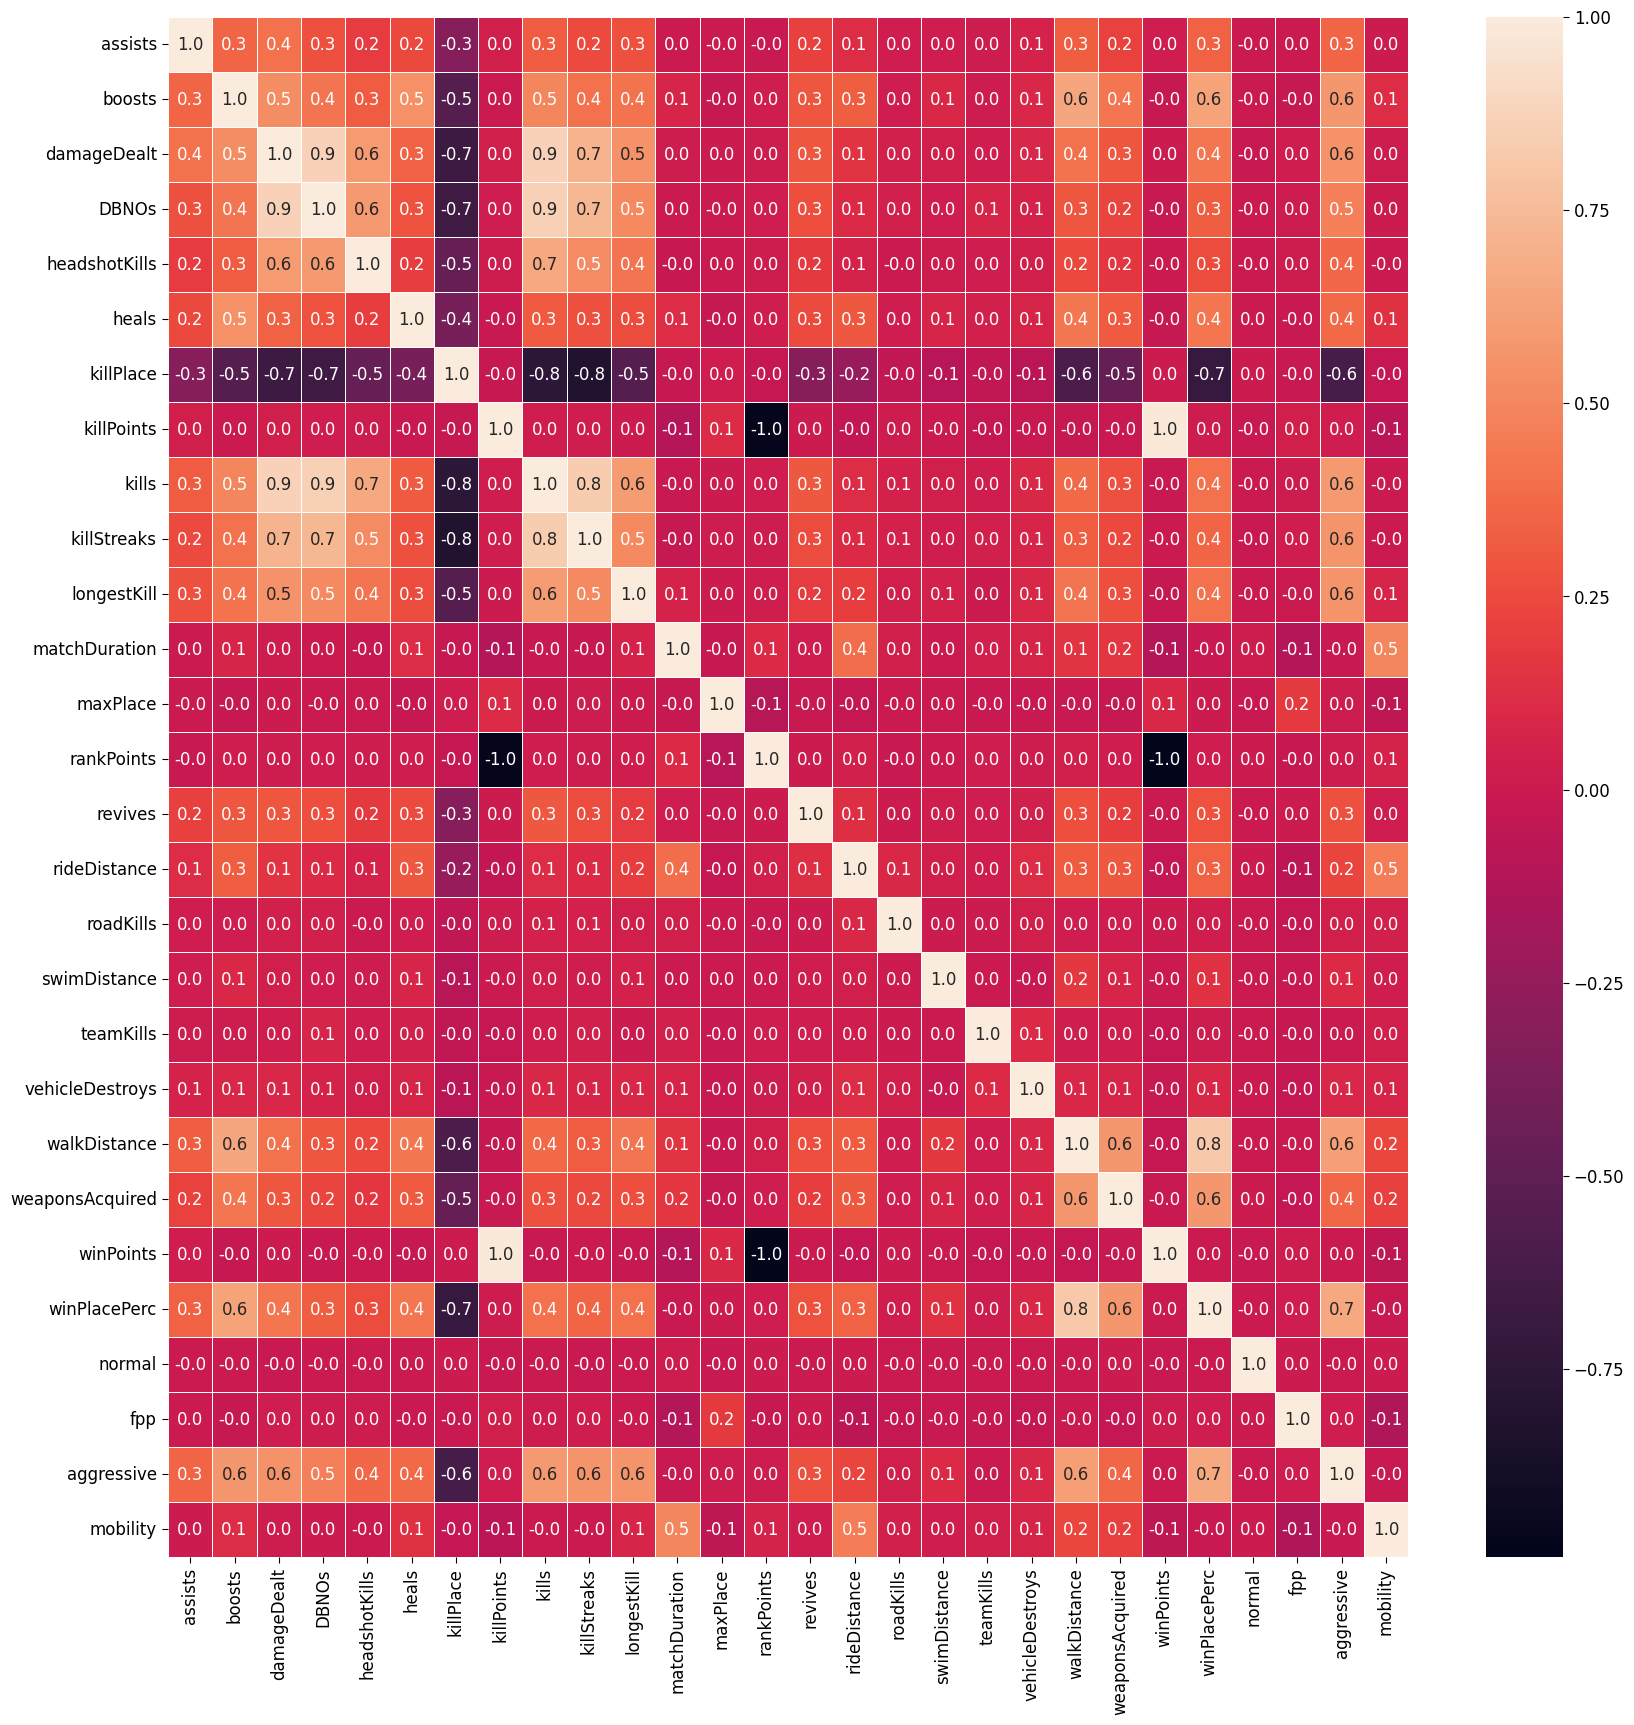

In [135]:
# 전체 컬럼 간의 히트맵
squad = df[(df['squad'] == 1)]
squad = squad.drop(['solo', 'duo', 'squad'], axis=1)
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(squad.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [89]:
df = df.drop('matchType', axis=1)

In [138]:
# 게임 중 총 이동거리
df['distanceTravelled'] = df['walkDistance'] + df['rideDistance'] + df['swimDistance']

# 움직인 거리 당 입힌 대미지
df['damagePerDistance'] = df['damageDealt'] / df['distanceTravelled']

df['damagePerDistance'] = df['damagePerDistance'].replace([np.inf, -np.inf], np.nan)
df['damagePerDistance'] = df['damagePerDistance'].fillna(df['damagePerDistance'].mean())

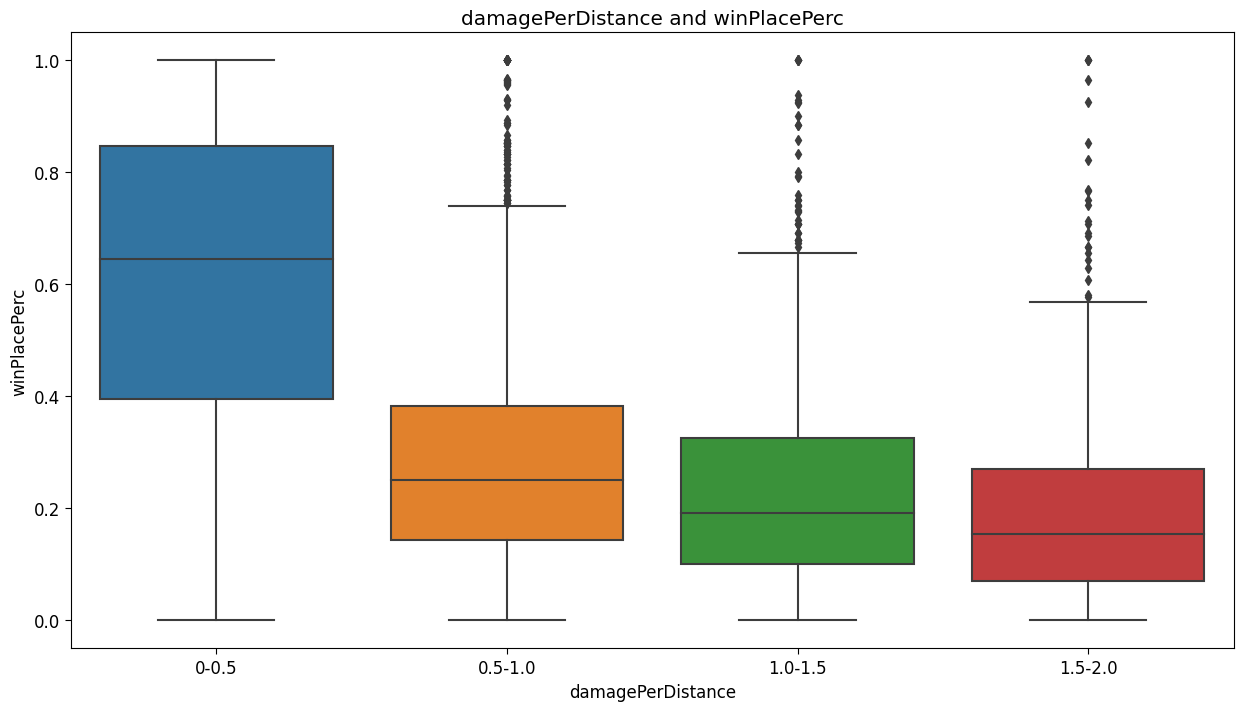

In [139]:
# damagePerDistance를 x (높을 수록 짧은 거리 당 교전을 많이 함), winPlacePerc를 y로
# 교전을 할 수록 승률이 낮아진다
import matplotlib.pyplot as plt
import warnings
import patchworklib as pw
warnings.filterwarnings("ignore")

# Solo

df['damagePerDistance'] = pd.cut(df['damagePerDistance'], [0,0.5,1,1.5,2.0], labels=['0-0.5', '0.5-1.0', '1.0-1.5','1.5-2.0'])

plt.figure(figsize=(15,8))
plt.title("damagePerDistance and winPlacePerc")
sns.boxplot(x="damagePerDistance", y="winPlacePerc", data=df)
plt.show()

In [91]:
#공격성 판별 기준 제작기
기준1=[]
기준2=[]
기준3=[]
기준4=[]

#20 이하의 등수는 전처리로 삭제했기 때문에 그 값들은 사용하지 않습니다.
#전체 게임 인원을 고려하여 순위에 따른 킬 확률을 산정한 기준입니다. 전체 인원 수 가 20명일 경우 20등이 사망시 킬은 평균적으로 1/19 늘어납니다. 19등이 사망시 1/18입니다.
#결국 평균 킬 수는 1/19+1/18+1/17.....+1/3 이런 식으로 늘어가기 때문에 언젠가 평균 킬이 1이 되는 순간 2가 되는 순간 등이 오게 되는데 그 순간들에 대한 기준입니다.
for i in range(20):
    기준1.append(-1)
    기준2.append(-1)
    기준3.append(-1)
    기준4.append(-1)


for d in range(20,101):
    sum=0
    check1=0
    check2=0
    check3=0
    check4=0
    for i in range(d,1,-1):
        sum+=1/(i-1)
        if ((sum>=1)&(check1==0)):
            기준1.append(i)
            check1=1
        if ((sum>=2)&(check2==0)):
            기준2.append(i)
            check2=1
        if ((sum>=3)&(check3==0)):
            기준3.append(i)
            check3=1
        if ((sum>=4)&(check4==0)):
            기준4.append(i)
            check4=1
        if(i==2):
            if(check1==0):
                기준1.append(-1)
            if(check2==0):
                기준2.append(-1)
            if(check3==0):
                기준3.append(-1)
            if(check4==0):
                기준4.append(-1)

# winPlace(순위) 컬럼 생성
df['winPlace'] = (1 - df['winPlacePerc']) * (df['maxPlace'] - 1) + 1
df['winPlace'] = df['winPlace'].round().astype(int)

df['aggressive']=0

for i in range(20,101):
    if (기준1[i]!=-1):
        df.loc[(i == df['maxPlace']) &
               (df['winPlace'] < 기준1[i]) & (df['kills'] > 0), 'aggressive'] = 1

for i in range(20, 101):
    if (기준2[i]!=-1):
        df.loc[(i == df['maxPlace']) &
               (기준1[i] < df['winPlace']) & (df['winPlace'] <= 기준2[i]) &
               (df['kills'] > 1), 'aggressive'] = 1

for i in range(20, 101):
    if (기준3[i]!=-1):
        df.loc[(i == df['maxPlace']) &
               (기준2[i] < df['winPlace']) & (df['winPlace'] <= 기준3[i]) &
               (df['kills'] > 2), 'aggressive'] = 1

print(df.shape)
print(df[df['aggressive']>=1].shape)

(4370900, 37)
(964705, 37)


In [92]:
# 1 평균 이동 거리 생성 칼럼인데 이동성 1,0 만들기에 필요해서 사용함
df['averageDistance'] = df['distanceTravelled'] / df['matchDuration']

# 결과 확인
print(df[['distanceTravelled','walkDistance', 'rideDistance', 'swimDistance', 'matchDuration', 'averageDistance']].head())

   distanceTravelled  walkDistance  rideDistance  swimDistance  matchDuration  \
0           244.8000        244.80        0.0000          0.00           1306   
1          1445.0445       1434.00        0.0045         11.04           1777   
2           161.8000        161.80        0.0000          0.00           1318   
3           202.7000        202.70        0.0000          0.00           1436   
4            49.7500         49.75        0.0000          0.00           1424   

   averageDistance  
0         0.187443  
1         0.813193  
2         0.122762  
3         0.141156  
4         0.034937  


In [93]:
#2. winPlacePer에 따라 계층 분류
df['WPPclass']=0
df['WPPclass'] = np.where((df['winPlacePerc'] >= 0) & (df['winPlacePerc'] <= 0.05), 0, df['WPPclass'])
for i in range(1,20):
    df['WPPclass'] = np.where((df['winPlacePerc'] > i*0.05) & (df['winPlacePerc'] <= i*0.05+0.05), i, df['WPPclass'])

# 결과 확인
print(df[[ 'winPlacePerc','WPPclass']].head())

   winPlacePerc  WPPclass
0        0.4444         8
1        0.6400        12
2        0.7755        15
3        0.1667         3
4        0.1875         3


In [94]:
#3.계층별 distanceMeanList의 평균을 내서 리스트에 저장
distanceMeanList=[]
for i in range(20):
    distanceMeanList.append(round(df.loc[df['WPPclass'] == i, 'distanceTravelled'].mean(),5))

print(distanceMeanList)

[62.54856, 120.03564, 183.66984, 263.30735, 347.5183, 469.97177, 631.51723, 845.29878, 1115.24435, 1463.55602, 1781.00604, 2169.54678, 2488.46478, 2842.8927, 3137.54435, 3415.2617, 3635.337, 3847.19895, 4049.19446, 4330.9642]


In [95]:
#WPPclass 평균보다 distanceTravelled 높은 활발하게 움직이는 사람은 1

df['mobility']=0

for i in range(20):
    df['mobility'] = np.where((df['WPPclass'] == i) & (df['distanceTravelled'] >= distanceMeanList[i]), 1, df['mobility'])


# 결과 확인
print(df[[ 'distanceTravelled','mobility','WPPclass']].head())
print(df.shape)
print(df[df['mobility']>=1].shape)

   distanceTravelled  mobility  WPPclass
0           244.8000         0         8
1          1445.0445         0        12
2           161.8000         0        15
3           202.7000         0         3
4            49.7500         0         3
(4370900, 40)
(1392157, 40)


In [96]:

#이동하지 않으며 공격성은 낮음
Li1=[]
for i in range(20):
    df1 = df[df['WPPclass'] == i]
    mom=len(df1)
    df3 = df1[(df1['mobility'] == 0) & (df1['aggressive'] == 0)]
    son=len(df3)
    Li1.append((son/mom)*100)


#이동은 하며 공격성이 낮음
Li2=[]
for i in range(20):
    df1 = df[df['WPPclass'] == i]
    mom=len(df1)
    df3 = df1[(df1['mobility'] == 1) & (df1['aggressive'] == 0)]
    son=len(df3)
    Li2.append((son/mom)*100)#등수 위치 분포(winPlacePerc)에 따른 0킬인 사람들의 비율


#이동하지 않으며 공격성은 높음
Li3=[]
for i in range(20):
    df1 = df[df['WPPclass'] == i]
    mom=len(df1)
    df3 = df1[(df1['mobility'] == 0) & (df1['aggressive'] == 1)]
    son=len(df3)
    Li3.append((son/mom)*100)


#이동은 하며 공격성이 높음
Li4=[]
for i in range(20):
    df1 = df[df['WPPclass'] == i]
    mom=len(df1)
    df3 = df1[(df1['mobility'] == 1) & (df1['aggressive'] == 1)]
    son=len(df3)
    Li4.append((son/mom)*100)

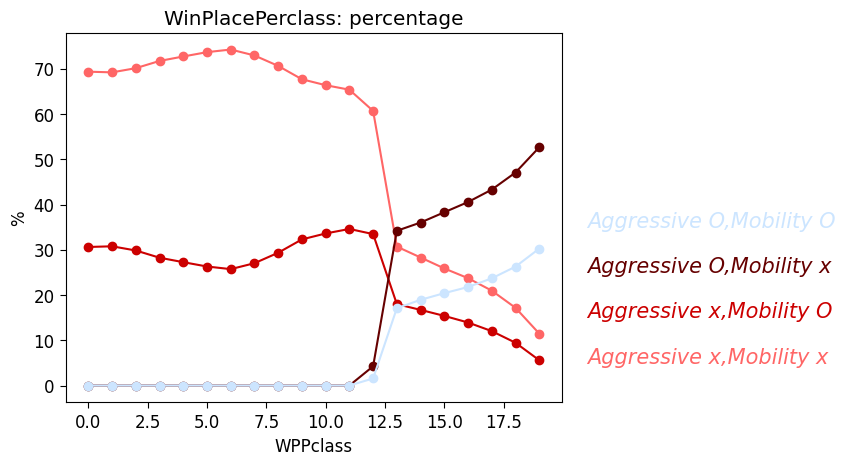

In [97]:
import matplotlib.pyplot as plt

x = range(0, 20)

plt.plot(x, Li1, marker='o', linestyle='-', color='#FF6666')
plt.plot(x, Li2, marker='o', linestyle='-', color='#CC0000')
plt.plot(x, Li3, marker='o', linestyle='-', color='#660000')
plt.plot(x, Li4, marker='o', linestyle='-', color='#CCE5FF')
plt.text(21,5,'Aggressive x,Mobility x',color='#FF6666',fontsize = 15,style = 'italic')
plt.text(21,15,'Aggressive x,Mobility O',color='#CC0000',fontsize = 15,style = 'italic')
plt.text(21,25,'Aggressive O,Mobility x',color='#660000',fontsize = 15,style = 'italic')
plt.text(21,35,'Aggressive O,Mobility O',color='#CCE5FF',fontsize = 15,style = 'italic')


plt.xlabel('WPPclass')
plt.ylabel('%')
plt.title('WinPlacePerclass: percentage')

plt.show()
#잘 안움직이고 전투를 하지 않는 사람들은 대부분으로 초반에 사망할 확률이 높음
#잘 움직이지만 공격성이 낮은 사람들은 초반, 중반 전투에서 사망할 확률이 높음
#잘 움직이지 않고 킬을 많이 내는 사람들은 유리한 고지를 선점한 사람들로 후반 승률이 높은 편이지만 중반에 추가이동 중 사망하는 경우가 많음
#잘 움직이며 킬을 많이 내는 사람들은 좋은 아이템과 위치 선정을 잘해서 후반 승률이 매우 높음

In [98]:
#그동한 사용하였던 임시 변수 + 중복 변수 제거
df = df.drop(['WPPclass','averageDistance','distanceTravelled','numGroups', 'winPlace'], axis=1)

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 50000개 샘플링
df = df.sample(n=50000, random_state=42)

# 입력 데이터(X)와 타겟 변수(y) 분리
excluded_columns = ["Id", "matchId", "groupId", "rankPoints", "maxPlace"]

X = df.drop(excluded_columns + ["winPlacePerc"], axis=1)
y = df["winPlacePerc"]

# 이진 변수 선택
binary_columns = ['solo', 'duo', 'squad', 'normal', 'fpp']

# 이진 변수를 제외한 수치형 변수 선택
numerical_columns = [col for col in X.columns if col not in binary_columns]

# 이진 변수를 제외한 수치형 변수에 대해 표준화
scaler = StandardScaler()
X_sc = X.copy()
X_sc[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# 이진 변수는 원래 값 그대로 사용
X_sc[binary_columns] = X[binary_columns]

# 이진 변수를 제외한 수치형 변수에 대해 정규화
minmax_scaler = MinMaxScaler()
X_mm = X.copy()
X_mm[numerical_columns] = minmax_scaler.fit_transform(X[numerical_columns])

# 이진 변수는 원래 값 그대로 사용
X_mm[binary_columns] = X[binary_columns]

# train과 test로 데이터 분리
X_train_sc, X_test_sc, y_train_sc, y_test_sc = train_test_split(X_sc, y, test_size=0.2, random_state=42)
X_train_mm, X_test_mm, y_train_mm, y_test_mm = train_test_split(X_mm, y, test_size=0.2, random_state=42)

In [100]:
# Assuming your DataFrame is named df
column_names = df.columns.tolist()

# Printing all column names
print(column_names)

['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill', 'matchDuration', 'maxPlace', 'rankPoints', 'revives', 'rideDistance', 'roadKills', 'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints', 'winPlacePerc', 'solo', 'duo', 'squad', 'normal', 'fpp', 'damagePerDistance', 'aggressive', 'mobility']


#SVR

In [103]:
#표준화 SVR 모델
svr_sc = SVR(kernel='rbf', C=100, gamma=0.01, epsilon=0.2)
model_sc_svr = svr_sc.fit(X_train_sc, y_train_sc)

In [104]:
#MinMaxScaler SVR 모델
svr_mm = SVR(kernel='rbf', C=0.1, gamma=0.1, epsilon=0.2)
model_mm_svr = svr_mm.fit(X_train_mm, y_train_mm)

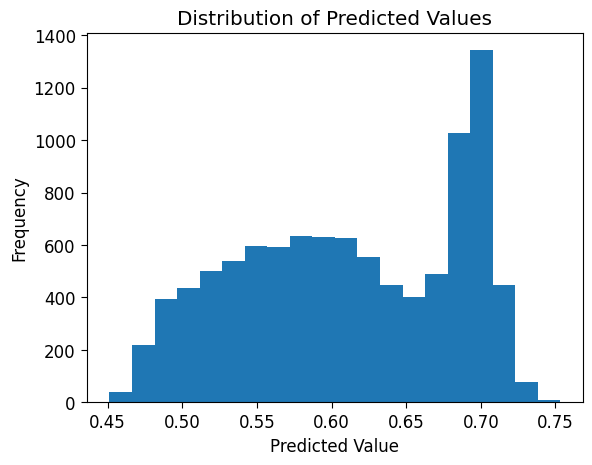

In [105]:
# 예측값 분포 - Standard Scaler SVR 모델

y_pred_svr_sc = model_sc_svr.predict(X_test_sc)
y_pred_svr_mm = model_mm_svr.predict(X_test_mm)

def logistic_function(x):
    return 1 / (1 + np.exp(-x))

# 예측 값 분포 확인
y_pred_svr_sc_limited = logistic_function(y_pred_svr_sc)

plt.hist(y_pred_svr_sc_limited, bins=20)
plt.xlabel('Predicted Value')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Values')
plt.show()

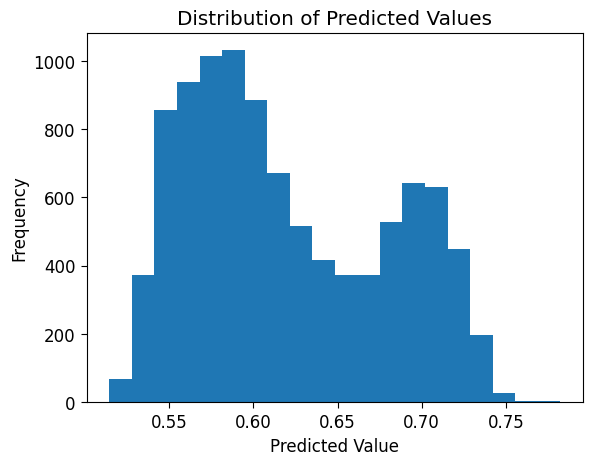

In [106]:
# 예측 값 분포 확인
y_pred_svr_mm_limited = logistic_function(y_pred_svr_mm)
plt.hist(y_pred_svr_mm_limited, bins=20)
plt.xlabel('Predicted Value')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Values')
plt.show()

In [107]:
from sklearn.metrics import mean_squared_error

mse_svr_sc = mean_squared_error(y_test_sc, y_pred_svr_sc_limited)
mse_rounded_svr_sc = round(mse_svr_sc, 2)


mse_svr_mm = mean_squared_error(y_test_mm, y_pred_svr_mm_limited)
mse_rounded_svr_mm = round(mse_svr_mm, 2)

from sklearn.metrics import r2_score

r2_svr_sc = r2_score(y_test_sc, y_pred_svr_sc)
r2_rounded_svr_sc = round(r2_svr_sc, 2)


r2_svr_mm = r2_score(y_test_mm, y_pred_svr_mm)
r2_rounded_svr_mm = round(r2_svr_mm, 2)


from sklearn.metrics import mean_absolute_error

mae_svr_sc = mean_absolute_error(y_test_sc, y_pred_svr_sc_limited)
mae_rounded_svr_sc = round(mae_svr_sc, 2)


mae_svr_mm = mean_absolute_error(y_test_mm, y_pred_svr_mm_limited)
mae_rounded_svr_mm = round(mae_svr_mm, 2)

from sklearn.metrics import mean_squared_error

mse_svr_sc = mean_squared_error(y_test_sc, y_pred_svr_sc_limited)
rmse_svr_sc = np.sqrt(mse_svr_sc)
rmse_rounded_svr_sc = round(rmse_svr_sc, 2)


mse_svr_mm = mean_squared_error(y_test_mm, y_pred_svr_mm_limited)
rmse_svr_mm = np.sqrt(mse_svr_mm)
rmse_rounded_svr_mm = round(rmse_svr_mm, 2)



print("SC Mean Squared Error:", mse_rounded_svr_sc)
print("SC R-squared:", r2_rounded_svr_sc)
print("SC MAE:", mae_rounded_svr_sc)
print("SC RMSE:", rmse_rounded_svr_sc)

print("MM Mean Squared Error:", mse_rounded_svr_mm)
print("MM R-squared:", r2_rounded_svr_mm)
print("MM MAE:", mae_rounded_svr_mm)
print("MM RMSE:", rmse_rounded_svr_mm)


SC Mean Squared Error: 0.07
SC R-squared: 0.91
SC MAE: 0.23
SC RMSE: 0.27
MM Mean Squared Error: 0.08
MM R-squared: 0.86
MM MAE: 0.24
MM RMSE: 0.29


#XGBoost

In [108]:
import xgboost as xgb

model_xgb_sc = xgb.XGBRegressor()
model_xgb_mm = xgb.XGBRegressor()
model_xgb_sc.fit(X_train_sc, y_train_sc)
model_xgb_mm.fit(X_train_mm, y_train_mm)
y_pred_xgb_sc = model_xgb_sc.predict(X_test_sc)
y_pred_xgb_mm = model_xgb_mm.predict(X_test_mm)

In [109]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5],
    'n_estimators': [100, 200, 300]
}

grid_search_sc = GridSearchCV(estimator=model_xgb_sc, param_grid=param_grid, cv=3)
grid_search_sc.fit(X_train_sc, y_train_sc)

print("SC Best Parameters:", grid_search_sc.best_params_)

best_model_xgb_sc = grid_search_sc.best_estimator_
y_pred_xgb_sc = best_model_xgb_sc.predict(X_test_sc)

SC Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}


In [110]:
grid_search_mm = GridSearchCV(estimator=model_xgb_mm, param_grid=param_grid, cv=3)
grid_search_mm.fit(X_train_mm, y_train_mm)

print("MM Best Parameters:", grid_search_mm.best_params_)

best_model_xgb_mm = grid_search_mm.best_estimator_
y_pred_xgb_mm = best_model_xgb_mm.predict(X_test_mm)

MM Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}


In [111]:
from sklearn.metrics import mean_squared_error

mse_xgb_sc = mean_squared_error(y_test_sc, y_pred_xgb_sc)
mse_rounded_xgb_sc = round(mse_xgb_sc, 2)
print("SC Mean Squared Error:", mse_rounded_xgb_sc)

from sklearn.metrics import r2_score

r2_xgb_sc = r2_score(y_test_sc, y_pred_xgb_sc)
r2_rounded_xgb_sc = round(r2_xgb_sc, 2)
print("SC R-squared:", r2_rounded_xgb_sc)
from sklearn.metrics import mean_absolute_error

mae_xgb_sc = mean_absolute_error(y_test_sc, y_pred_xgb_sc)
mae_rounded_xgb_sc = round(mae_xgb_sc, 2)
print("SC MAE:", mae_rounded_xgb_sc)

from sklearn.metrics import mean_squared_error

mse_xgb_sc = mean_squared_error(y_test_sc, y_pred_xgb_sc)
rmse_xgb_sc = np.sqrt(mse_xgb_sc)
rmse_rounded_xgb_sc = round(rmse_xgb_sc, 2)
print("SC RMSE:", rmse_rounded_xgb_sc)

SC Mean Squared Error: 0.0
SC R-squared: 0.95
SC MAE: 0.05
SC RMSE: 0.07


In [112]:

mse_xgb_mm = mean_squared_error(y_test_sc, y_pred_xgb_mm)
mse_rounded_xgb_mm = round(mse_xgb_mm, 2)
print("MM Mean Squared Error:", mse_rounded_xgb_mm)


r2_xgb_mm = r2_score(y_test_sc, y_pred_xgb_mm)
r2_rounded_xgb_mm = round(r2_xgb_mm, 2)
print("MM R-squared:", r2_rounded_xgb_mm)


mae_xgb_mm = mean_absolute_error(y_test_sc, y_pred_xgb_mm)
mae_rounded_xgb_mm = round(mae_xgb_mm, 2)
print("MM MAE:", mae_rounded_xgb_mm)

mse_xgb_mm = mean_squared_error(y_test_sc, y_pred_xgb_mm)
rmse_xgb_mm = np.sqrt(mse_xgb_mm)
rmse_rounded_xgb_mm = round(rmse_xgb_mm, 2)
print("MM RMSE:", rmse_rounded_xgb_mm)

MM Mean Squared Error: 0.0
MM R-squared: 0.95
MM MAE: 0.05
MM RMSE: 0.07


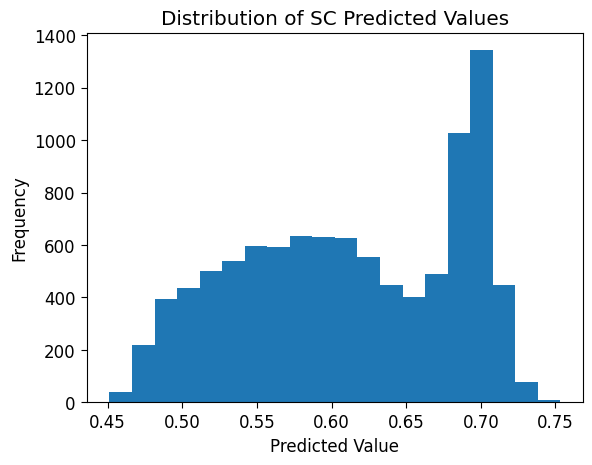

In [113]:
# 예측 값 분포 확인
y_pred_xgb_sc_limited = logistic_function(y_pred_xgb_sc)
plt.hist(y_pred_svr_sc_limited, bins=20)
plt.xlabel('Predicted Value')
plt.ylabel('Frequency')
plt.title('Distribution of SC Predicted Values')
plt.show()

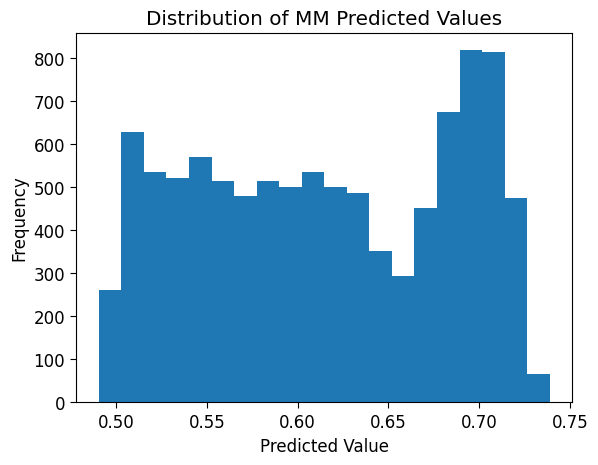

In [114]:
# 예측 값 분포 확인
y_pred_xgb_mm_limited = logistic_function(y_pred_xgb_mm)
plt.hist(y_pred_xgb_mm_limited, bins=20)
plt.xlabel('Predicted Value')
plt.ylabel('Frequency')
plt.title('Distribution of MM Predicted Values')
plt.show()

# CatBoost

In [115]:
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor

# 튜닝할 하이퍼파라미터 설정
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [3, 5, 7],
    'iterations': [500, 1000],
    'l2_leaf_reg': [1, 3, 5]
}

# GridSearchCV를 이용해 최적의 하이퍼파라미터 찾기 - StandardScaler 적용 데이터
grid_search_sc = GridSearchCV(estimator=CatBoostRegressor(verbose=False), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search_sc.fit(X_train_sc, y_train_sc)

# 최적의 하이퍼파라미터 출력
print("StandardScaler를 이용한 최적의 하이퍼파라미터: ", grid_search_sc.best_params_)
best_grid_sc = grid_search_sc.best_estimator_

# GridSearchCV를 이용해 최적의 하이퍼파라미터 찾기 - MinMaxScaler 적용 데이터
grid_search_mm = GridSearchCV(estimator=CatBoostRegressor(verbose=False), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search_mm.fit(X_train_mm, y_train_mm)

# 최적의 하이퍼파라미터 출력
print("MinMaxScaler를 이용한 최적의 하이퍼파라미터: ", grid_search_mm.best_params_)
best_grid_mm = grid_search_mm.best_estimator_


Fitting 3 folds for each of 54 candidates, totalling 162 fits
StandardScaler를 이용한 최적의 하이퍼파라미터:  {'depth': 7, 'iterations': 1000, 'l2_leaf_reg': 1, 'learning_rate': 0.05}
Fitting 3 folds for each of 54 candidates, totalling 162 fits
MinMaxScaler를 이용한 최적의 하이퍼파라미터:  {'depth': 7, 'iterations': 1000, 'l2_leaf_reg': 1, 'learning_rate': 0.05}


StandardScaler를 이용한 CatBoost의 성능 지표
MSE: 0.004692156999169156
MAE: 0.05160521770137089
R-squared: 0.9503107478091186


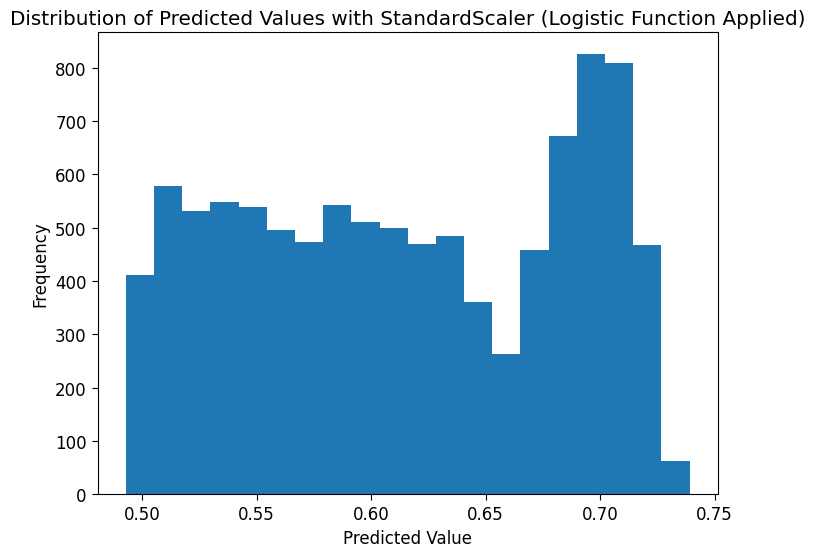

MinMaxScaler를 이용한 CatBoost의 성능 지표
MSE: 0.004692167731648981
MAE: 0.05160513437135581
R-squared: 0.9503106341537364


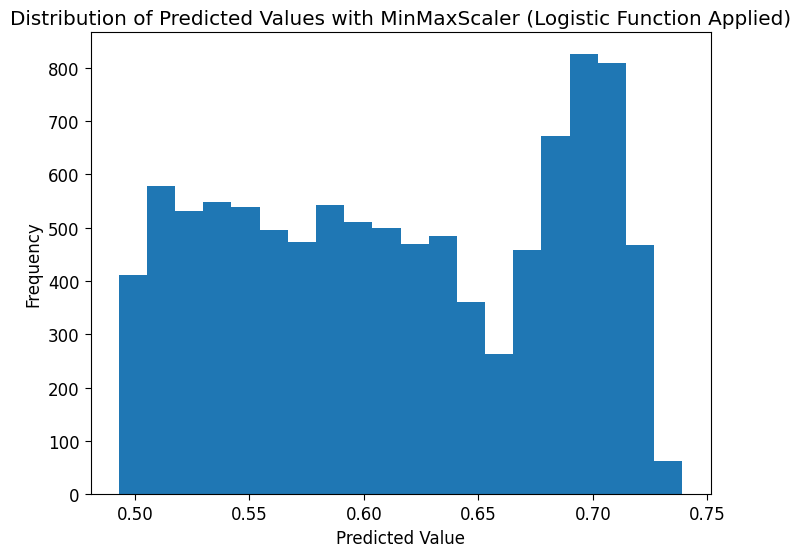

In [116]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# 로지스틱 함수 정의
def logistic_function(x):
    return 1 / (1 + np.exp(-x))

# StandardScaler를 이용한 CatBoost 최적 파라미터 적용
catboost_sc_best = CatBoostRegressor(depth=7, iterations=1000, l2_leaf_reg=1, learning_rate=0.05, verbose=False)
catboost_sc_best.fit(X_train_sc, y_train_sc)
y_pred_sc_best = catboost_sc_best.predict(X_test_sc)

# 성능 지표 출력
print("StandardScaler를 이용한 CatBoost의 성능 지표")
print('MSE:', mean_squared_error(y_test_sc, y_pred_sc_best))
print('MAE:', mean_absolute_error(y_test_sc, y_pred_sc_best))
print('R-squared:', r2_score(y_test_sc, y_pred_sc_best))

# 예측값에 로지스틱 함수 적용
y_pred_sc_best_limited = logistic_function(y_pred_sc_best)

# 히스토그램으로 시각화
plt.figure(figsize=(8, 6))
plt.hist(y_pred_sc_best_limited, bins=20)
plt.xlabel('Predicted Value')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Values with StandardScaler (Logistic Function Applied)')
plt.show()

# MinMaxScaler를 이용한 CatBoost 최적 파라미터 적용
catboost_mm_best = CatBoostRegressor(depth=7, iterations=1000, l2_leaf_reg=1, learning_rate=0.05, verbose=False)
catboost_mm_best.fit(X_train_mm, y_train_mm)
y_pred_mm_best = catboost_mm_best.predict(X_test_mm)

# 성능 지표 출력
print("MinMaxScaler를 이용한 CatBoost의 성능 지표")
print('MSE:', mean_squared_error(y_test_mm, y_pred_mm_best))
print('MAE:', mean_absolute_error(y_test_mm, y_pred_mm_best))
print('R-squared:', r2_score(y_test_mm, y_pred_mm_best))

# 예측값에 로지스틱 함수 적용
y_pred_mm_best_limited = logistic_function(y_pred_mm_best)

# 히스토그램으로 시각화
plt.figure(figsize=(8, 6))
plt.hist(y_pred_mm_best_limited, bins=20)
plt.xlabel('Predicted Value')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Values with MinMaxScaler (Logistic Function Applied)')
plt.show()


# LightGBM

In [117]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor

# 튜닝할 하이퍼파라미터 설정
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [10, 20, 30],
    'n_estimators': [100, 200, 300],
    'num_leaves': [31, 62, 93]
}

# GridSearchCV를 이용해 최적의 하이퍼파라미터 찾기 - StandardScaler 적용 데이터
grid_search_sc = GridSearchCV(estimator=LGBMRegressor(), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search_sc.fit(X_train_sc, y_train_sc)

# 최적의 하이퍼파라미터 출력
print("StandardScaler를 이용한 최적의 하이퍼파라미터: ", grid_search_sc.best_params_)
best_grid_sc = grid_search_sc.best_estimator_

# GridSearchCV를 이용해 최적의 하이퍼파라미터 찾기 - MinMaxScaler 적용 데이터
grid_search_mm = GridSearchCV(estimator=LGBMRegressor(), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search_mm.fit(X_train_mm, y_train_mm)

# 최적의 하이퍼파라미터 출력
print("MinMaxScaler를 이용한 최적의 하이퍼파라미터: ", grid_search_mm.best_params_)
best_grid_mm = grid_search_mm.best_estimator_


Fitting 3 folds for each of 81 candidates, totalling 243 fits
StandardScaler를 이용한 최적의 하이퍼파라미터:  {'learning_rate': 0.05, 'max_depth': 30, 'n_estimators': 200, 'num_leaves': 93}
Fitting 3 folds for each of 81 candidates, totalling 243 fits
MinMaxScaler를 이용한 최적의 하이퍼파라미터:  {'learning_rate': 0.05, 'max_depth': 30, 'n_estimators': 200, 'num_leaves': 93}


StandardScaler를 이용한 LightGBM의 평가 지표:
MAE:  0.05179535495634263
MSE:  0.004754430586267441
R^2:  0.9496512796850329


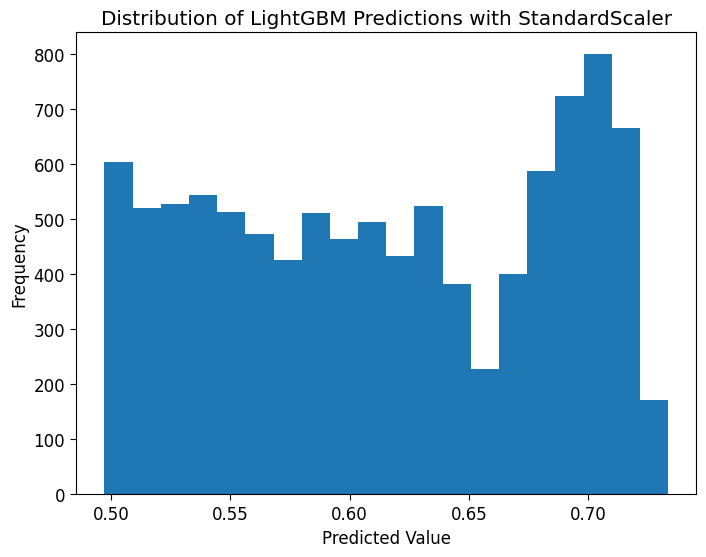


MinMaxScaler를 이용한 LightGBM의 평가 지표:
MAE:  0.05192288417234925
MSE:  0.004773931417826114
R^2:  0.9494447687482883


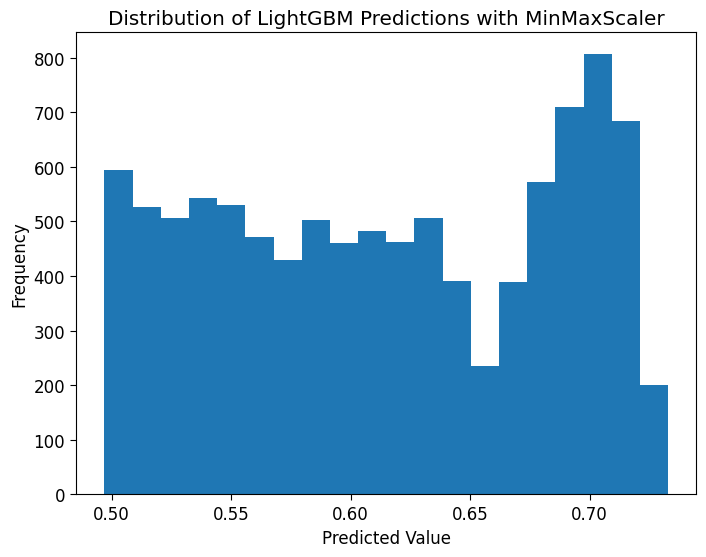

In [118]:
# 최적의 하이퍼파라미터로 LightGBM 모델 훈련 - StandardScaler 적용 데이터
lgbm_sc_best = LGBMRegressor(**grid_search_sc.best_params_)
lgbm_sc_best.fit(X_train_sc, y_train_sc)

# 예측 및 평가
y_pred_sc_best = lgbm_sc_best.predict(X_test_sc)
mae_sc_best = mean_absolute_error(y_test_sc, y_pred_sc_best)
mse_sc_best = mean_squared_error(y_test_sc, y_pred_sc_best)
r2_sc_best = r2_score(y_test_sc, y_pred_sc_best)

print("StandardScaler를 이용한 LightGBM의 평가 지표:")
print("MAE: ", mae_sc_best)
print("MSE: ", mse_sc_best)
print("R^2: ", r2_sc_best)

# 로지스틱 함수 적용 및 변환된 예측 값 분포 확인
y_pred_sc_limited = logistic_function(y_pred_sc_best)
plt.figure(figsize=(8, 6))
plt.hist(y_pred_sc_limited, bins=20)
plt.xlabel('Predicted Value')
plt.ylabel('Frequency')
plt.title('Distribution of LightGBM Predictions with StandardScaler')
plt.show()


# 최적의 하이퍼파라미터로 LightGBM 모델 훈련 - MinMaxScaler 적용 데이터
lgbm_mm_best = LGBMRegressor(**grid_search_mm.best_params_)
lgbm_mm_best.fit(X_train_mm, y_train_mm)

# 예측 및 평가
y_pred_mm_best = lgbm_mm_best.predict(X_test_mm)
mae_mm_best = mean_absolute_error(y_test_mm, y_pred_mm_best)
mse_mm_best = mean_squared_error(y_test_mm, y_pred_mm_best)
r2_mm_best = r2_score(y_test_mm, y_pred_mm_best)

print("\nMinMaxScaler를 이용한 LightGBM의 평가 지표:")
print("MAE: ", mae_mm_best)
print("MSE: ", mse_mm_best)
print("R^2: ", r2_mm_best)

# 로지스틱 함수 적용 및 변환된 예측 값 분포 확인
y_pred_mm_limited = logistic_function(y_pred_mm_best)
plt.figure(figsize=(8, 6))
plt.hist(y_pred_mm_limited, bins=20)
plt.xlabel('Predicted Value')
plt.ylabel('Frequency')
plt.title('Distribution of LightGBM Predictions with MinMaxScaler')
plt.show()


In [121]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 28.6 MB/s eta 0:00:00


# XGBoost XAI

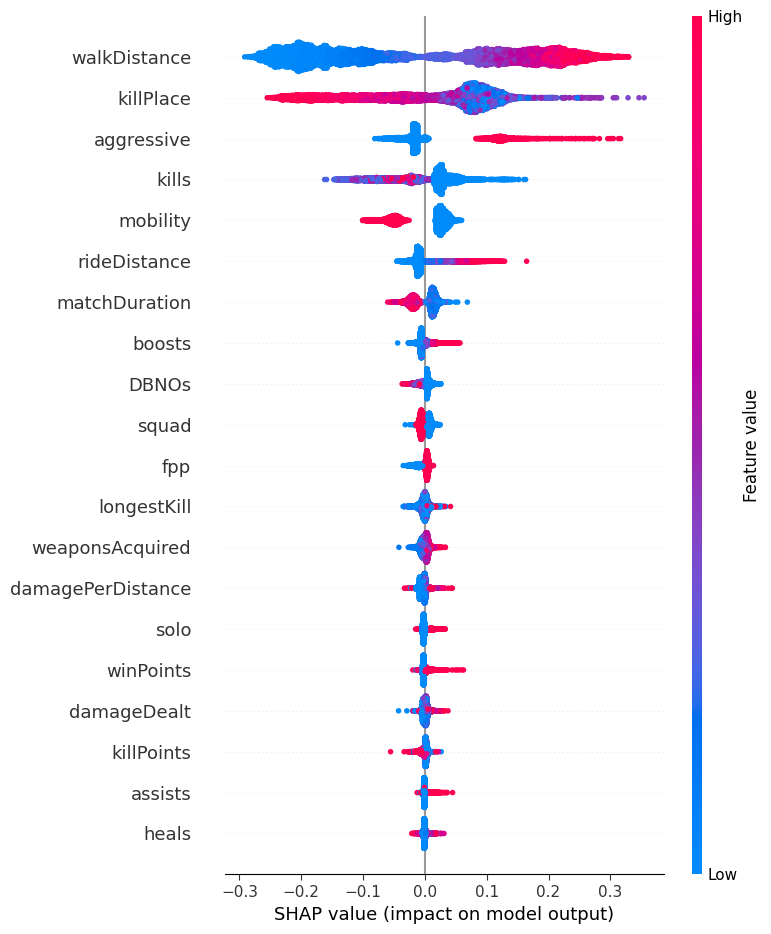

In [122]:
import shap
# SHAP TreeExplainer 객체 생성
explainer_sc = shap.TreeExplainer(model_xgb_sc)

# SHAP 값을 계산
shap_values_sc = explainer_sc.shap_values(X_test_sc)

# SHAP 요약 플롯 생성
shap.summary_plot(shap_values_sc, X_test_sc)

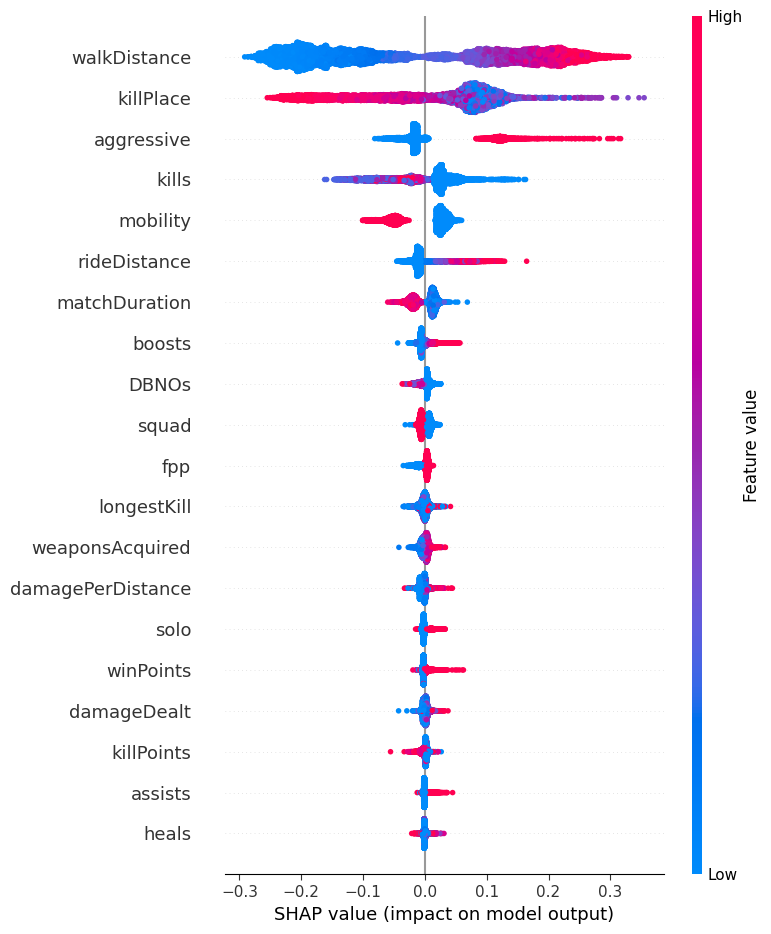

In [123]:
# SHAP TreeExplainer 객체 생성
explainer_mm = shap.TreeExplainer(model_xgb_mm)

# SHAP 값을 계산
shap_values_mm = explainer_mm.shap_values(X_test_mm)

# SHAP 요약 플롯 생성
shap.summary_plot(shap_values_mm, X_test_mm)